In [1]:
%%capture state
from __future__ import division
from __future__ import print_function

import sys, os
sys.path.append('../')

import tensorflow as tf
import keras.backend as K
import numpy as np
import gc

from models.neural_network import NeuralNetwork
from models.cnn import CNN

os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# Create TF session and set as Keras backend session
gpu_options = tf.GPUOptions(allow_growth=False)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
K.set_session(sess)

#Seed used for all calculations of training and test point indices 
SEED = 14

In [2]:
## Visualization of samples
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def visualize(image):
    plt.figure(figsize=(1, 1))
    if image.shape[-1] == 1:
        # image is in black and white
        image = image[:, :, 0]
        plt.imshow(image, cmap='Greys')
    else:
        # image is in color
        plt.imshow(image)
    plt.axis('off')
    plt.show()

#Normalize rows of a given matrix
def normalize(matrix):
    for i in range(matrix.shape[0]):
        matrix[i] = matrix[i]/np.linalg.norm(matrix[i]) 
    return matrix

In [3]:
input_shape = (32,32,3)
num_classes = 2
eps=0.1


In [4]:
#Load model from disk
model_name = 'CIFAR2'
model_save_path = '../trained_models/' + model_name + '-model.json'
weights_save_path = '../trained_models/' + model_name + 'weights'
model = CNN(model_name=model_name, dataset='cifar2')
print (model.num_params)
model.load_model(model_save_path, weights_save_path) 
#epochs = 20
#model.train(epochs=epochs)
#model.save_model(model_save_path, weights_save_path)   

16797378
Loaded model from disk


In [5]:
def hessians(ys, xs):
    """Calculate hessian of operation ys wrt vectors xs"""
    
    # Gradient
    dx = tf.gradients(ys, xs)
    length = len(dx)
    for j in range(length):
        if j == 0:
            temp_dx = tf.reshape(dx[j], [-1])
        else:
            temp_dx_t = tf.reshape(dx[j], [-1])
            temp_dx = tf.concat([temp_curr, temp_curr_t], 0)
    dx = temp_dx

    # Hessian
    hessian = list()
    for i in range(3072):
        dx_i = tf.slice(dx, begin=[i] , size=[1])
        ddx_i = tf.gradients(dx_i, xs)
        for k in range(len(ddx_i)):
            if k == 0:
                temp_ddx_i = tf.reshape(ddx_i[k], [-1])
            else:
                temp_ddx_i_t = tf.reshape(ddx_i[k], [-1])
                temp_ddx_i = tf.concat([temp_ddx_i, temp_ddx_i_t], 0)
        
        hessian.append(temp_ddx_i)  
    
    hess_mat = tf.stack(hessian)
    return hess_mat

In [6]:
x = tf.placeholder(dtype= tf.float32, shape=(1,32, 32, 3))
y = tf.placeholder(dtype = tf.float32, shape=(1,2))
hess_ = hessians(model.training_loss, model.input_placeholder) #hessians(x, model.training_loss)
hess = model.sess.run(hess_,
                feed_dict={
                    model.input_placeholder: model.test_data[0].reshape(1,32,32,3),
                    model.labels_placeholder: model.test_labels[0].reshape(1,2),
                    K.learning_phase():0 })


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [8]:
hess.shape

(3072, 3072)

In [10]:
np.linalg.matrix_rank(hess)

1

In [14]:
w, v = np.linalg.eig(hess)

In [20]:
np.mean(np.real(w))

3.0801748e-06

In [53]:
np.min(np.real(w))
    

-5.4513932e-11

In [67]:
np.max(np.sort(np.real(w))[:-2])

3.667967e-11

[   2.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    2.    3.    5.    7.   10.   16.   16.   24.   42.   29.   53.   64.
   87.  113.  158.  233.  403.  745.  307.  200.  129.  103.   77.   52.
   48.   42.   27.   16.   19.   16.    6.    6.    7.    0.    2.    0.
    2.]
[ -5.45139316e-11  -5.26528377e-11  -5.07917437e-11  -4.89306498e-11
  -4.70695559e-11  -4.52084620e-11  -4.33473681e-11  -4.14862742e-11
  -3.96251803e-11  -3.77640864e-11  -3.59029925e-11  -3.40418986e-11
  -3.21808046e-11  -3.03197107e-11  -2.84586168e-11  -2.65975229e-11
  -2.47364290e-11  -2.28753351e-11  -2.10142412e-11  -1.91531473e-11
  -1.72920534e-11  -1.54309595e-11  -1.35698656e-11  -1.17087716e-11
  -9.84767774e-12  -7.98658383e-12  -6.12548992e-12  -4.26439601e-12
  -2.40330210e-12  -5.42208189e-13   1.31888572e-12   3.17997963e-12
   5.04107354e-12   6.90216745e-12   8.76326136e-12   1.06243553e-11
   1.24854492e-11   1.43465431e-11   1.62076370e-11   1.80687309e-11
   1.99298

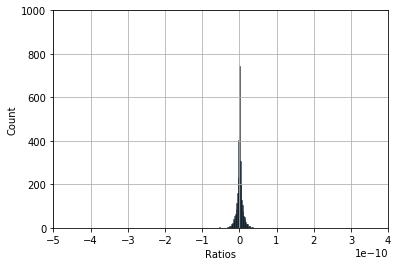

In [76]:
n, bins, patches = plt.hist(np.sort(np.real(w))[:-1], np.linspace(np.min(np.real(w)), 3.667967e-11, 50),alpha=0.5, histtype='bar', ec='black')
print (n)
print (bins)
plt.axis([-5e-10,4e-10 , 0, 1000])
plt.xlabel('Ratios')
plt.ylabel('Count')
plt.grid(True)
plt.show()